<a href="https://colab.research.google.com/github/e-margot/bachelor-s-degree/blob/main/crop_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import json
import os
from torchvision.transforms import ToTensor, PILToTensor, ConvertImageDtype, Compose
import os.path
from typing import Any, Callable, Optional, Tuple, List
from torchvision.datasets.vision import VisionDataset

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, PILToTensor
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.models as models
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# def write_json(new_data, new_data2, new_data3, new_data4, new_data5, new_data6,  filename = 'ann.json'):
def write_json_ann(new_data, new_data2, new_data3, new_data4, new_data5, new_data6,  path):
    filename = path + 'ann.json'
    with open(filename, 'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside annotation
        new = {new_data: new_data2, new_data3: new_data4, new_data5: new_data6}
        file_data["annotations"].append(new)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

In [ ]:
# def write_json(new_data, new_data2, new_data3, new_data4, filename = 'ann.json'):
def write_json_cat(new_data, new_data2, new_data3, new_data4, path):
    filename = path + 'ann.json'
    with open(filename, 'r+') as file:
        file_data = json.load(file)
        new = {new_data: new_data2, new_data3: new_data4}
        file_data["categories"].append(new)
        file.seek(0)
        json.dump(file_data, file, indent = 4)

In [ ]:
def crop_img_with_ann(path, file_name):
  shift = 256
  x_left = 0
  y_left = 0
  x_right = 0
  y_right = 0
  for i in file_name["annotations"]:
    if (i['bbox'][2] <= 256 and i['bbox'][3] <= 256):
      if i['bbox'][2] % 2 == 1:
        i['bbox'][2] += 1
      if i['bbox'][3] % 2 == 1:
        i['bbox'][3] += 1
      a = int((shift - i['bbox'][2])/2)
      b = int((shift - i['bbox'][3])/2)
      x_left = i['bbox'][0] - a
      y_left = i['bbox'][1] - b
      x_right = i['bbox'][0] + i['bbox'][2] + a
      y_right = i['bbox'][1] + i['bbox'][3] + b
      for j in file_name["images"]:
        if i['image_id'] == j['id']:
          img = Image.open(path + j['file_name'])
          area = (x_left, y_left, x_right, y_right)
          cropped_img = img.crop(area)
          cropped_img.save(str(path + 'new_data/' + (os.path.splitext(os.path.basename(j['file_name'])))[0] + '_obj' + str(i['id']) + '.jpg'))
          write_json_ann("id", i['id'], "category_id", i['category_id'], "file_name", str(path + 'new_data/' + (os.path.splitext(os.path.basename(j['file_name'])))[0] + '_obj' + str(i['id']) + '.jpg'), path)
          break
  for i in file_name["categories"]:
    write_json_cat("id", i['id'], "name", i['name'], path)

In [ ]:
path = '/content/drive/MyDrive/FLIR_ADAS_v2/FLIR_ADAS_v2/images_thermal_val/'
f1 = open(path + 'coco.json')
data1 = json.load(f1)
crop_img_with_ann(path, data1)
f1.close()

In [ ]:
path = '/content/drive/MyDrive/FLIR_ADAS_v2/FLIR_ADAS_v2/images_thermal_train/'
f1 = open(path + 'coco.json')
data1 = json.load(f1)
crop_img_with_ann(path, data1)
f1.close()

In [ ]:
path = '/content/drive/MyDrive/FLIR_ADAS_v2/FLIR_ADAS_v2/video_rgb_test/'
f1 = open(path + 'coco.json')
data1 = json.load(f1)
crop_img_with_ann(path, data1)
f1.close()

In [ ]:
path = '/content/drive/MyDrive/FLIR_ADAS_v2/FLIR_ADAS_v2/video_thermal_test/'
f1 = open(path + 'coco.json')
data1 = json.load(f1)
crop_img_with_ann(path, data1)
f1.close()

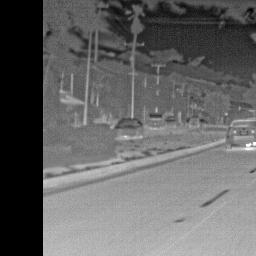

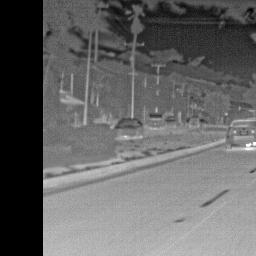

In [ ]:
path = r"/content/drive/MyDrive/FLIR_ADAS_v2/FLIR_ADAS_v2/images_thermal_train/new_data/video-GzdKTLbkG5F7gAunM-frame-000449-Qh6wHFh6Ax3SDM7Qx_obj123.jpg"
img_conv = Image.open(path).convert('L')
img = Image.open(path)
display(img)
display(img_conv)

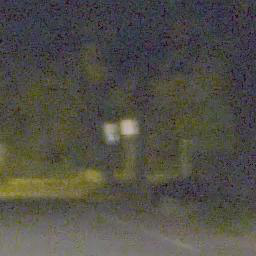

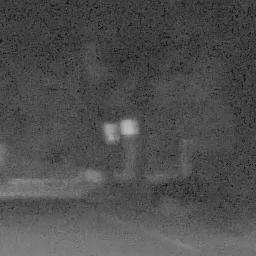

In [ ]:
path = r"/content/drive/MyDrive/FLIR_ADAS_v2/FLIR_ADAS_v2/images_rgb_train/new_data/video-23bsd9bsr962GdFBZ-frame-000221-arDqqfMYcrbEEqsex_obj1.jpg"
img_conv = Image.open(path).convert('L')
img = Image.open(path)
display(img)
display(img_conv)